In [1]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Detección de valores vacios
import missingno as msno # !pip install missingno

# Libreria para valores aleatorios
import random

# Librerias de Machine Learning
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [2]:
pwd

'/content'

In [3]:
# Cargar Datos
df = pd.read_csv('Dataset_Infartos.csv',sep=';')
df.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,0
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,0
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,0
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,0


# Exploración de Datos

In [4]:
# conociendo el dimensionamiento
df.shape

(43400, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43400 non-null  int64  
 1   Genero                  43400 non-null  object 
 2   Edad                    43400 non-null  float64
 3   Flag_hipertension       43400 non-null  int64  
 4   Flag_problem_cardiaco   43400 non-null  int64  
 5   Estados_civil           43400 non-null  object 
 6   Tipo_trabajo            43400 non-null  object 
 7   Zona_residencia         43400 non-null  object 
 8   Promedio_nivel_glucosa  43400 non-null  float64
 9   IMC                     41938 non-null  float64
 10  Flag_fumador            30108 non-null  object 
 11  Ataque_cardiaco         43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


## Analisis de Valores Vacios

In [6]:
# valores vacios
df.isna().sum() / 43400
#df.isna().sum()

,0
ID,0.000000
Genero,0.000000
Edad,0.000000
Flag_hipertension,0.000000
Flag_problem_cardiaco,0.000000
Estados_civil,0.000000
Tipo_trabajo,0.000000
Zona_residencia,0.000000
Promedio_nivel_glucosa,0.000000
IMC,0.033687


<Axes: >

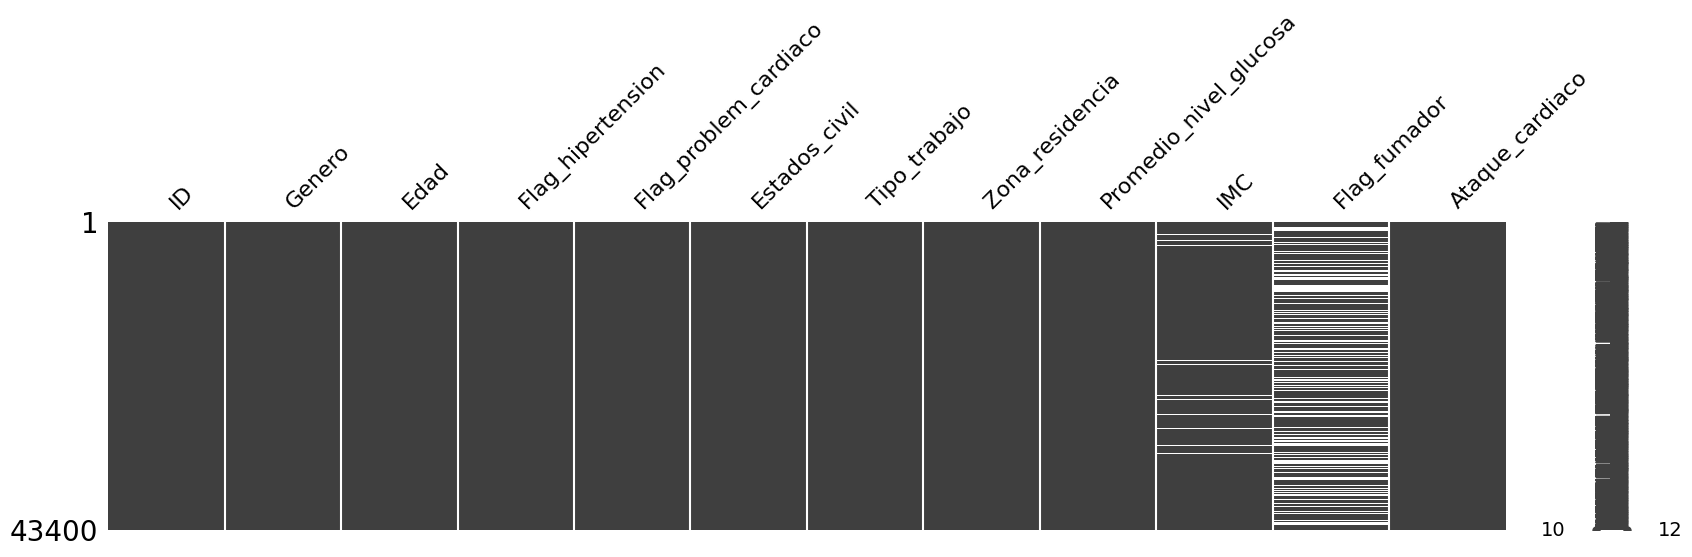

In [7]:
# Ver la correlacion o relación de los vacios
msno.matrix(df, figsize=(20, 4))

## Como esta distribuido nuestra Variable Target

In [8]:
df['Ataque_cardiaco'].value_counts(1)

,proportion
Ataque_cardiaco,
0,0.981959
1,0.018041


## Analizar variables numericas

In [9]:
df.describe()

,ID,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,IMC,Ataque_cardiaco
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


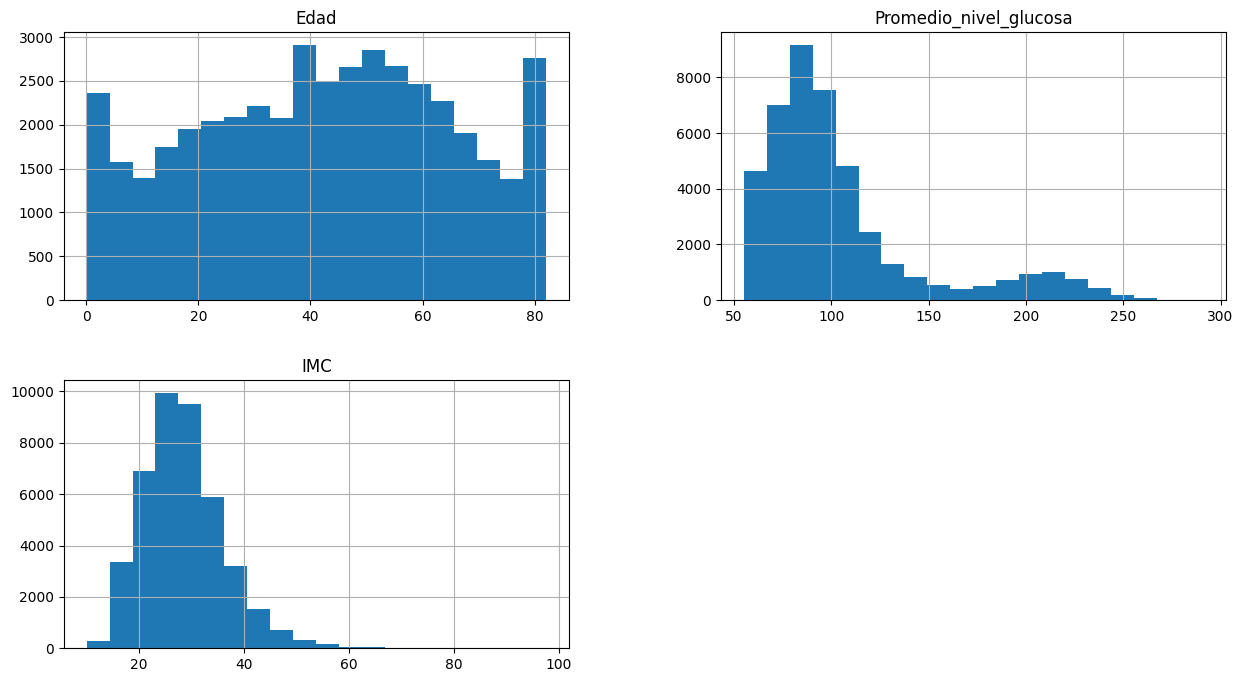

In [10]:
# Graficar histograma de las variables Edad, glucosa y IMC
df[['Edad','Promedio_nivel_glucosa','IMC']].hist(bins=20,figsize=(15,8))
plt.show()

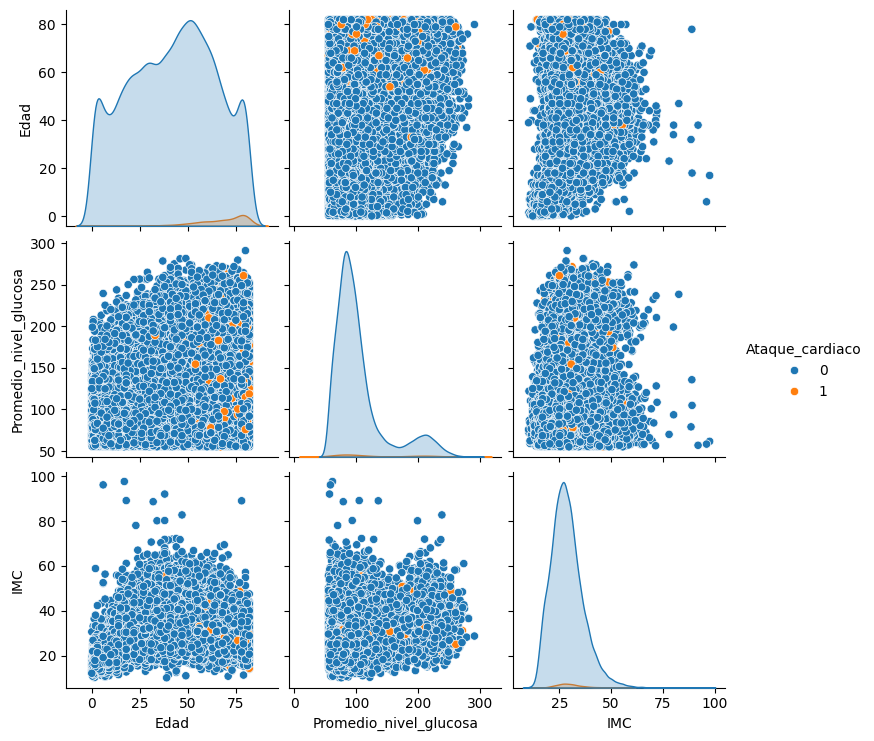

In [11]:
# Analisis multivariable
sns.pairplot(df[['Edad','Promedio_nivel_glucosa','IMC','Ataque_cardiaco']], hue='Ataque_cardiaco')
plt.show()

In [12]:
# Calcular correlaciones
df[['Edad','Promedio_nivel_glucosa','IMC','Ataque_cardiaco']].corr()

,Edad,Promedio_nivel_glucosa,IMC,Ataque_cardiaco
Edad,1.000000,0.237627,0.358897,0.156049
Promedio_nivel_glucosa,0.237627,1.000000,0.191295,0.078917
IMC,0.358897,0.191295,1.000000,0.020285
Ataque_cardiaco,0.156049,0.078917,0.020285,1.000000


In [13]:
df[['Edad','Promedio_nivel_glucosa','IMC','Ataque_cardiaco','Flag_hipertension','Flag_problem_cardiaco']].corr()

,Edad,Promedio_nivel_glucosa,IMC,Ataque_cardiaco,Flag_hipertension,Flag_problem_cardiaco
Edad,1.000000,0.237627,0.358897,0.156049,0.272169,0.250188
Promedio_nivel_glucosa,0.237627,1.000000,0.191295,0.078917,0.160211,0.146938
IMC,0.358897,0.191295,1.000000,0.020285,0.161225,0.057677
Ataque_cardiaco,0.156049,0.078917,0.020285,1.000000,0.075332,0.113763
Flag_hipertension,0.272169,0.160211,0.161225,0.075332,1.000000,0.119777
Flag_problem_cardiaco,0.250188,0.146938,0.057677,0.113763,0.119777,1.000000


## Analizar variables cualitativas

In [14]:
df.select_dtypes(include='object').head(2)

,Genero,Estados_civil,Tipo_trabajo,Zona_residencia,Flag_fumador
0,Hombre,No,cuidar_ninos,Rural,NaN
1,Hombre,Si,Empresa_privada,Urbano,Nunca_fuma


### Analizar la variable Genero

In [15]:
# Conocer la distribución de mi variable
df['Genero'].value_counts(1)

,proportion
Genero,
Mujer,0.591359
Hombre,0.408387
Other,0.000253


In [16]:
# Ataque cardiaco por Genero
df[['Genero','Ataque_cardiaco']].groupby(by='Genero').agg(['count','sum','mean'])

Ataque_cardiaco               
                 count  sum      mean
Genero                               
Hombre           17724  352  0.019860
Mujer            25665  431  0.016793
Other               11    0  0.000000

### Analizar la variable Estados_Civil

In [17]:
# Conocer la distribución de mi variable
df['Estados_civil'].value_counts(1)

,proportion
Estados_civil,
Si,0.643733
No,0.356267


In [18]:
# Ataque cardiaco por Estados_civil
df[['Estados_civil','Ataque_cardiaco']].groupby(by='Estados_civil').agg(['count','sum','mean'])

Ataque_cardiaco               
                        count  sum      mean
Estados_civil                               
No                      15462   80  0.005174
Si                      27938  703  0.025163

### Analizar la variable Tipo_trabajo

In [19]:
# Conocer la distribución de mi variable
df['Tipo_trabajo'].value_counts(1)

,proportion
Tipo_trabajo,
Empresa_privada,0.572212
Emprendedor,0.156521
cuidar_ninos,0.141843
En_gobierno,0.125346
Nunca_trabajo,0.004078


In [20]:
# Ataque cardiaco por Nunca_trabajo
df[['Tipo_trabajo','Ataque_cardiaco']].groupby(by='Tipo_trabajo').agg(['count','sum','mean'])

Ataque_cardiaco               
                          count  sum      mean
Tipo_trabajo                                  
Emprendedor                6793  251  0.036950
Empresa_privada           24834  441  0.017758
En_gobierno                5440   89  0.016360
Nunca_trabajo               177    0  0.000000
cuidar_ninos               6156    2  0.000325

### Analizar la variable Zona_residencia

In [21]:
# Conocer la distribución de mi variable
df['Zona_residencia'].value_counts(1)

,proportion
Zona_residencia,
Urbano,0.50129
Rural,0.49871


In [22]:
# Ataque cardiaco por Nunca_trabajo
df[['Zona_residencia','Ataque_cardiaco']].groupby(by='Zona_residencia').agg(['count','sum','mean'])

Ataque_cardiaco               
                          count  sum      mean
Zona_residencia                               
Rural                     21644  384  0.017742
Urbano                    21756  399  0.018340

### Analizar la variable Flag_fumador

In [23]:
# Conocer la distribución de mi variable
df['Flag_fumador'].value_counts(1)

,proportion
Flag_fumador,
Nunca_fuma,0.533181
antes_fumaba,0.248871
fumador,0.217949


In [24]:
# Ataque cardiaco por Nunca_trabajo
df[['Flag_fumador','Ataque_cardiaco']].groupby(by='Flag_fumador').agg(['count','sum','mean'])

Ataque_cardiaco               
                       count  sum      mean
Flag_fumador                               
Nunca_fuma             16053  284  0.017691
antes_fumaba            7493  221  0.029494
fumador                 6562  133  0.020268

## Conclusiones de variables

Variables Numericas importantes:
- Edad
- Flag_problem_cardiaco
- Promedio_nivel_glucosa
- Flag_hipertension
- IMC

Variables Cualitativas importantes:
- Estados_Civil
- Tipo_trabajo


## Tratamiento de Datos (IMC)

In [25]:
df['IMC'].describe()

,IMC
count,41938.000000
mean,28.605038
std,7.770020
min,10.100000
25%,23.200000
50%,27.700000
75%,32.900000
max,97.600000


In [26]:
# Promedio y desviacion del IMC
IMC_avg = df['IMC'].mean()
IMC_std = df['IMC'].std()
IMC_avg, IMC_std

(28.605038390004296, 7.770020497238696)

In [27]:
# Calculo de valore svacios para IMC
IMC_nullnum = df['IMC'].isna().sum()
IMC_nullnum

1462

In [28]:
# Generar la lista de valores a reemplazar
#np.random.randint(IMC_avg - IMC_std, IMC_avg +  IMC_std,size = IMC_nullnum)
random.seed(123)
IMC_lista_vacios = np.random.uniform(IMC_avg - IMC_std, IMC_avg +  IMC_std, size = IMC_nullnum)
IMC_lista_vacios

array([21.76647004, 26.28498456, 28.60902723, ..., 30.98867634,
       25.07047193, 24.35600945])

In [29]:
np.isnan(df['IMC'])

,IMC
0,False
1,False
2,False
3,False
4,False
...,...
43395,False
43396,False
43397,False
43398,False


In [30]:
# Filtrar valores vacios en df['IMC']
df.loc[np.isnan(df['IMC']), 'IMC']

,IMC
81,NaN
95,NaN
113,NaN
186,NaN
231,NaN
...,...
43317,NaN
43339,NaN
43351,NaN
43371,NaN


In [31]:
# Reemplazar los valores vacios por la lista de arriba
df.loc[np.isnan(df['IMC']), 'IMC'] = IMC_lista_vacios

In [32]:
df['IMC'].describe()

,IMC
count,43400.000000
mean,28.600180
std,7.682245
min,10.100000
25%,23.300000
50%,27.800000
75%,32.800000
max,97.600000


## Transformar Variables

In [33]:
# Transformar variable: Edad
df['Edad_Encoded'] = 0
df.loc[df['Edad']<5, 'Edad_Encoded'] = 1 # Primera Infancia
df.loc[(df['Edad']>=5) & (df['Edad']<=11), 'Edad_Encoded'] = 2 # Infancia
df.loc[(df['Edad']>=12) & (df['Edad']<=18), 'Edad_Encoded'] = 3 #Adolescencia
df.loc[(df['Edad']>=14) & (df['Edad']<=26), 'Edad_Encoded'] = 4 #Joven
df.loc[(df['Edad']>=27) & (df['Edad']<=59), 'Edad_Encoded'] = 5 #Adultez
df.loc[df['Edad']>=60, 'Edad_Encoded'] = 6 #Vejez

In [34]:
# Transformar variable de Promedio Nivel Gluca
df['Gluocosa_Encoded'] = 0
df.loc[df['Promedio_nivel_glucosa']<100, 'Gluocosa_Encoded'] = 1 # Normal
df.loc[(df['Promedio_nivel_glucosa']>=100) & (df['Promedio_nivel_glucosa']<=125), 'Gluocosa_Encoded'] = 2 # Prediabetes
df.loc[df['Promedio_nivel_glucosa']>=126, 'Gluocosa_Encoded'] = 3 # Diabetes

In [35]:
# Transformar variable de IMC
df['IMC_Encoded']  = 0
df.loc[df['IMC']<18.5, 'IMC_Encoded'] = 1 # Bajo Peso
df.loc[(df['IMC']>=18.5) & (df['IMC']<=24.9), 'IMC_Encoded'] = 2 # Peso Saludable
df.loc[(df['IMC']>=25) & (df['IMC']<=29.9), 'IMC_Encoded'] = 3 # Sobrepeso
df.loc[df['IMC']>=30, 'IMC_Encoded'] = 4 # Obesidad

In [36]:
# Transformar mis variables Cualitativas: Estados_Civil
df['Estado_Encoded'] = df['Estados_civil'].map({'Si':1,'No':2,'':2}).astype(int)

In [37]:
# Transformar mis variables Cualitativas: Tipo Trabajo
df['TipoTrabajo_Encoded'] = df['Tipo_trabajo'].map({'Emprendedor':1,
                                                    'Empresa_privada':2,
                                                    'En_gobierno':3,
                                                    'Nunca_trabajo':4,
                                                    'cuidar_ninos':4,
                                                    '':4}).astype(int)

In [38]:
df.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,0,1,1,1,2,4
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,0,5,1,4,1,2
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,0,2,2,1,2,2
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,0,6,1,4,1,2
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,0,4,3,2,2,4


## Filtrar dataset para ejecución del modelo

In [39]:
df.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,0,1,1,1,2,4
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,0,5,1,4,1,2
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,0,2,2,1,2,2
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,0,6,1,4,1,2
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,0,4,3,2,2,4


In [40]:
# Filtrar valores transformados + variables numericas
df_encoded = df[['Ataque_cardiaco','Flag_hipertension','Flag_problem_cardiaco',
                 'Edad_Encoded','Gluocosa_Encoded','IMC_Encoded','Estado_Encoded','TipoTrabajo_Encoded']]

In [41]:
df_encoded.head()

,Ataque_cardiaco,Flag_hipertension,Flag_problem_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded
0,0,0,0,1,1,1,2,4
1,0,1,0,5,1,4,1,2
2,0,0,0,2,2,1,2,2
3,0,0,0,6,1,4,1,2
4,0,0,0,4,3,2,2,4


# Libreria de Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
/content/drive/MyDrive/1.jpg

In [ ]:
# Cargar el dataset a la fuente de la máquina virtual desde su computadora o Drive
from google.colab import files
uploaded = files.upload()

# Balanceo de datos

In [42]:
df_encoded['Ataque_cardiaco'].value_counts(1)

,proportion
Ataque_cardiaco,
0,0.981959
1,0.018041


In [43]:
X = df_encoded.drop('Ataque_cardiaco',axis=1)
y = df_encoded['Ataque_cardiaco']

In [44]:
X.head()

,Flag_hipertension,Flag_problem_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded
0,0,0,1,1,1,2,4
1,1,0,5,1,4,1,2
2,0,0,2,2,1,2,2
3,0,0,6,1,4,1,2
4,0,0,4,3,2,2,4


In [45]:
# Calcular mi dataset de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [46]:
len(X_train), len(X_test), len(y_train), len(y_test)

(34720, 8680, 34720, 8680)

In [47]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train.head()

,Flag_hipertension,Flag_problem_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded,Ataque_cardiaco
2998,0,0,5,1,2,1,3,0
4400,0,0,5,1,3,1,2,0
19188,0,0,1,1,2,2,4,0
22323,0,0,5,1,4,1,1,0
18132,0,0,4,1,3,2,2,0


In [48]:
count_class_0, count_class_1 = df_train['Ataque_cardiaco'].value_counts()
print(count_class_0, count_class_1)

34099 621


In [49]:
df_train_class_0 = df_train[df_train['Ataque_cardiaco'] == 0]
df_train_class_1 = df_train[df_train['Ataque_cardiaco'] == 1]

In [50]:
count_class_0, count_class_1, df_train_class_0.shape, df_train_class_1.shape

(34099, 621, (34099, 8), (621, 8))

## UnderSampling

In [51]:
# Obtener una muestra de cantidad de la categoria minoritaria del dataset de la clase mayoritaria
df_train_class_0_under = df_train_class_0.sample(count_class_1,random_state = 123)

In [52]:
# Concatenar el datset obtenido con el dataset de la clase minoritaria
df_train_u = pd.concat([df_train_class_0_under, df_train_class_1], axis=0)

In [53]:
# Revisión de la distribución de la variable ataque_cardiaco
df_train_u['Ataque_cardiaco'].value_counts(1)

,proportion
Ataque_cardiaco,
0,0.5
1,0.5


In [54]:
df_train_u['Ataque_cardiaco'].value_counts()

,count
Ataque_cardiaco,
0,621
1,621


## OverSampling

In [55]:
# Obtener una muestra de cantidad de la categoria mayoritaria del dataset de la clase minoriatia
df_train_class_1_over = df_train_class_1.sample(count_class_0,random_state = 123,replace = True)

In [56]:
# Concatenar el datset obtenido con el dataset de la clase minoritaria
df_train_o = pd.concat([df_train_class_1_over, df_train_class_0], axis=0)

In [57]:
# Revisión de la distribución de la variable ataque_cardiaco
df_train_o['Ataque_cardiaco'].value_counts(1)

,proportion
Ataque_cardiaco,
1,0.5
0,0.5


In [58]:
df_train_o['Ataque_cardiaco'].value_counts()

,count
Ataque_cardiaco,
1,34099
0,34099


## SMOOTE

In [59]:
# Ejemplo Smoote
df_ejemplo = pd.concat([df_train[df_train['Ataque_cardiaco']==0].head(5),df_train[df_train['Ataque_cardiaco']==1].head(2)],axis = 0)
df_ejemplo

,Flag_hipertension,Flag_problem_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded,Ataque_cardiaco
2998,0,0,5,1,2,1,3,0
4400,0,0,5,1,3,1,2,0
19188,0,0,1,1,2,2,4,0
22323,0,0,5,1,4,1,1,0
18132,0,0,4,1,3,2,2,0
38090,1,1,6,1,4,2,2,1
24199,0,0,5,2,4,2,2,1


In [60]:
# Defino mis X e Y
aux_1 = df_ejemplo.drop('Ataque_cardiaco',axis=1)
aux_2 = df_ejemplo['Ataque_cardiaco']

# Entrenar el algoritmos
smote = SMOTE(k_neighbors=1,random_state=123,sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(aux_1, aux_2)

In [61]:
# Resultados
pd.concat( [X_smote,y_smote],axis=1)

,Flag_hipertension,Flag_problem_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded,Ataque_cardiaco
0,0,0,5,1,2,1,3,0
1,0,0,5,1,3,1,2,0
2,0,0,1,1,2,2,4,0
3,0,0,5,1,4,1,1,0
4,0,0,4,1,3,2,2,0
5,1,1,6,1,4,2,2,1
6,0,0,5,2,4,2,2,1
7,0,0,5,1,4,2,2,1
8,0,0,5,1,4,2,2,1
9,0,0,5,1,4,2,2,1


In [62]:
# Ejecutar SMOOTE a todos los datos
smote = SMOTE(k_neighbors=3,random_state=123,sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)
df_train_smote = pd.concat([X_smote,y_smote],axis=1)

In [63]:
df_train_smote['Ataque_cardiaco'].value_counts(1)

,proportion
Ataque_cardiaco,
0,0.5
1,0.5


In [64]:
df_train_smote['Ataque_cardiaco'].value_counts(0)

,count
Ataque_cardiaco,
0,34099
1,34099


## ¿Cuál es la mejor tecnica para balancear datos?

In [65]:
df_train_u.shape, df_train_o.shape, df_train_smote.shape

((1242, 8), (68198, 8), (68198, 8))

In [66]:
# Ejecutar un modelo sencillo (ARBOL DE DECISION)
# DATA SIN BALANCEO

# 1) llamar al modelo
model = DecisionTreeClassifier(random_state=123)

# 2) Entrenar el modelo
model.fit(X_train,y_train)

# 3) Predicción
y_pred = model.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('Reporte de classification')
print(classification_report(y_test,y_pred,digits = 3))

acurracy:
0.9808755760368664
Reporte de confusion_matrix
[[8514    4]
 [ 162    0]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.981     1.000     0.990      8518
           1      0.000     0.000     0.000       162

    accuracy                          0.981      8680
   macro avg      0.491     0.500     0.495      8680
weighted avg      0.963     0.981     0.972      8680



In [67]:
# DATA BALANCEADOS (undersampling)

# 1) llamar al modelo
model = DecisionTreeClassifier(random_state=123)

# 1.5) Obtener X_train e y_train
X_train_u = df_train_u.drop('Ataque_cardiaco',axis=1)
y_train_u = df_train_u['Ataque_cardiaco']

# 2) Entrenar el modelo
model.fit(X_train_u,y_train_u)

# 3) Predicción
y_pred = model.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('Reporte de classification')
print(classification_report(y_test,y_pred,digits = 3))

acurracy:
0.7339861751152074
Reporte de confusion_matrix
[[6246 2272]
 [  37  125]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.994     0.733     0.844      8518
           1      0.052     0.772     0.098       162

    accuracy                          0.734      8680
   macro avg      0.523     0.752     0.471      8680
weighted avg      0.977     0.734     0.830      8680



In [68]:
# DATA BALANCEADOS (OverSampling)

# 1) llamar al modelo
model = DecisionTreeClassifier(random_state=123)

# 1.5) Obtener X_train e y_train
X_train_o = df_train_o.drop('Ataque_cardiaco',axis=1)
y_train_o = df_train_o['Ataque_cardiaco']

# 2) Entrenar el modelo
model.fit(X_train_o,y_train_o)

# 3) Predicción
y_pred = model.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('Reporte de classification')
print(classification_report(y_test,y_pred,digits = 3))

acurracy:
0.7142857142857143
Reporte de confusion_matrix
[[6090 2428]
 [  52  110]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.992     0.715     0.831      8518
           1      0.043     0.679     0.081       162

    accuracy                          0.714      8680
   macro avg      0.517     0.697     0.456      8680
weighted avg      0.974     0.714     0.817      8680



In [69]:
# DATA BALANCEADOS (SMOOTE)

# 1) llamar al modelo
model = DecisionTreeClassifier(random_state=123)

# 1.5) Obtener X_train e y_train
X_train_s = df_train_smote.drop('Ataque_cardiaco',axis=1)
y_train_s = df_train_smote['Ataque_cardiaco']

# 2) Entrenar el modelo
model.fit(X_train_s,y_train_s)

# 3) Predicción
y_pred = model.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('Reporte de classification')
print(classification_report(y_test,y_pred,digits = 3))

acurracy:
0.7201612903225807
Reporte de confusion_matrix
[[6142 2376]
 [  53  109]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.991     0.721     0.835      8518
           1      0.044     0.673     0.082       162

    accuracy                          0.720      8680
   macro avg      0.518     0.697     0.459      8680
weighted avg      0.974     0.720     0.821      8680



In [70]:
# Elección del Modelo
Tabla = pd.DataFrame({'Balanceo':['Original','Under','Over','Smote'],
                      'Accuracy': [98.07,71.16,71.53,72.24],
                      'Precision':[0,0.047,0.043,0.044],
                      'Recall':[0,0.741,0.679,0.673],
                      'F1':[0,0.089,0.082,0.083]})
Tabla

,Balanceo,Accuracy,Precision,Recall,F1
0,Original,98.07,0.000,0.000,0.000
1,Under,71.16,0.047,0.741,0.089
2,Over,71.53,0.043,0.679,0.082
3,Smote,72.24,0.044,0.673,0.083


# Ejecución de Modelos

In [71]:
# Obtener X_train e y_train
X_train_u = df_train_u.drop('Ataque_cardiaco',axis=1)
y_train_u = df_train_u['Ataque_cardiaco']

## Xgboost (Sin Tunear)

In [72]:
# 1) llamar al modelo
model1 = xgb.XGBClassifier(random_state=123)

# 2) Entrenar el modelo
model1.fit(X_train_u,y_train_u)

# 3) Predicción
y_pred1 = model1.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred1))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred1))
print('Reporte de classification')
print(classification_report(y_test,y_pred1,digits = 3))

acurracy:
0.6858294930875576
Reporte de confusion_matrix
[[5827 2691]
 [  36  126]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.994     0.684     0.810      8518
           1      0.045     0.778     0.085       162

    accuracy                          0.686      8680
   macro avg      0.519     0.731     0.447      8680
weighted avg      0.976     0.686     0.797      8680



## Xgboost (Tuneado)

In [73]:
# 1) llamar al modelo
model2 = xgb.XGBClassifier(random_state=123,n_estimators = 10, max_depth = 4, learning_rate=0.1,subsample = 0.5)

# 2) Entrenar el modelo
model2.fit(X_train_u,y_train_u)

# 3) Predicción
y_pred2 = model2.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred2))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred2))
print('Reporte de classification')
print(classification_report(y_test,y_pred2,digits = 3))

acurracy:
0.7182027649769586
Reporte de confusion_matrix
[[6107 2411]
 [  35  127]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.994     0.717     0.833      8518
           1      0.050     0.784     0.094       162

    accuracy                          0.718      8680
   macro avg      0.522     0.750     0.464      8680
weighted avg      0.977     0.718     0.819      8680



## Random Forest (Sin Tunear)

In [74]:
# 1) llamar al modelo
model3 = RandomForestClassifier(random_state=123)

# 2) Entrenar el modelo
model3.fit(X_train_u,y_train_u)

# 3) Predicción
y_pred3 = model3.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred3))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred3))
print('Reporte de classification')
print(classification_report(y_test,y_pred3,digits = 3))

acurracy:
0.7108294930875576
Reporte de confusion_matrix
[[6044 2474]
 [  36  126]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.994     0.710     0.828      8518
           1      0.048     0.778     0.091       162

    accuracy                          0.711      8680
   macro avg      0.521     0.744     0.460      8680
weighted avg      0.976     0.711     0.814      8680



## Random Foreste (Tuneado)

In [75]:
# 1) llamar al modelo
model4 = RandomForestClassifier(random_state=123,n_estimators = 10 , max_depth = 4)

# 2) Entrenar el modelo
model4.fit(X_train_u,y_train_u)

# 3) Predicción
y_pred4 = model4.predict(X_test)

# 4) Evaluación
print('acurracy:')
print(accuracy_score(y_test,y_pred4))
print('Reporte de confusion_matrix')
print(confusion_matrix(y_test,y_pred4))
print('Reporte de classification')
print(classification_report(y_test,y_pred4,digits = 3))

acurracy:
0.6773041474654378
Reporte de confusion_matrix
[[5747 2771]
 [  30  132]]
Reporte de classification
              precision    recall  f1-score   support

           0      0.995     0.675     0.804      8518
           1      0.045     0.815     0.086       162

    accuracy                          0.677      8680
   macro avg      0.520     0.745     0.445      8680
weighted avg      0.977     0.677     0.791      8680



In [76]:
# Elección del Modelo
Tabla1 = pd.DataFrame({'Modelos':['Xgboost (Sin Tuneo)','Xgboost (Con Tuneo)','RandomForest (Sin Tuneo)','RandomForest (Con Tuneo)','Arbol Decision'],
                      'Accuracy': [68.89, 71.42, 69.15,67.35,71.61],
                      'Precision':[0.044,0.050,0.045,0.045,0.047],
                      'Recall':[0.759,0.769,0.772,0.821,0.741],
                      'F1':[0.084,0.084,0.085,0.086,0.089]})
Tabla1

,Modelos,Accuracy,Precision,Recall,F1
0,Xgboost (Sin Tuneo),68.89,0.044,0.759,0.084
1,Xgboost (Con Tuneo),71.42,0.050,0.769,0.084
2,RandomForest (Sin Tuneo),69.15,0.045,0.772,0.085
3,RandomForest (Con Tuneo),67.35,0.045,0.821,0.086
4,Arbol Decision,71.61,0.047,0.741,0.089


In [86]:
import pickle

In [87]:
#Exporta el modelo para usarlo despues
pickle.dump(model4, open('model4.pkl','wb'))

In [92]:
# carga el modelo para poderlo ejecutar
model4_jb = pickle.load(open('model4.pkl','rb'))

# La predicción con nuevos datos

In [89]:
df_encoded.head(2)

,Ataque_cardiaco,Flag_hipertension,Flag_problem_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded
0,0,0,0,1,1,1,2,4
1,0,1,0,5,1,4,1,2


In [98]:
# Definimos un conjunto de datos ficticios
datos_dummy = pd.DataFrame({'Flag_hipertension':[1],
                            'Flag_problem_cardiaco' : [1],
                            'Edad_Encoded':[5],
                            'Gluocosa_Encoded':[2],
                            'IMC_Encoded':[2],
                            'Estado_Encoded':[1],
                            'TipoTrabajo_Encoded':[4]})

In [99]:
datos_dummy

,Flag_hipertension,Flag_problem_cardiaco,Edad_Encoded,Gluocosa_Encoded,IMC_Encoded,Estado_Encoded,TipoTrabajo_Encoded
0,1,1,5,2,2,1,4


In [100]:
model4.predict(datos_dummy)

array([1])

In [101]:
model4_jb.predict(datos_dummy)

array([1])